In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,         # Rastgele 0–20 derece döndürme
    width_shift_range=0.1,     # Genişlikte %10 kaydırma
    height_shift_range=0.1,    # Yükseklikte %10 kaydırma
    #shear_range=0.1,           # Kesme
    #zoom_range=0.1,            # Yakınlaştırma
    horizontal_flip=True,      # Yatay çevirme
    fill_mode='nearest',       # Boş kalan pikselleri doldurma yöntemi
    validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'day_night/',
    target_size=(128,128),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    'day_night/',
    target_size=(128,128),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

Found 2678 images belonging to 2 classes.
Found 668 images belonging to 2 classes.


In [2]:
print(train_gen.class_indices)
print(train_gen.image_shape)
print(train_gen.dtype)


{'dayY': 0, 'nightT': 1}
(128, 128, 3)
float32


In [3]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("✅ GPU kullanılacak.")
else:
    print("⚠️ GPU yok, CPU kullanılacak.")

import tensorflow as tf
print("GPU var mı:", tf.config.list_physical_devices('GPU'))
 
from tensorflow.python.platform import build_info as tf_build_info
#print("cuDNN version :", tf_build_info.cudnn_version_number)



⚠️ GPU yok, CPU kullanılacak.
GPU var mı: []


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # overfitting'i azaltır
    Dense(2, activation='softmax')  # uygun çıkış katmanı
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = train_gen.samples // train_gen.batch_size
validation_steps = val_gen.samples // val_gen.batch_size

history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_data=val_gen,
    validation_steps=val_gen.samples // val_gen.batch_size,
    epochs=10
)


d:\asd\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\asd\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8721 - loss: 0.3316 - val_accuracy: 0.9250 - val_loss: 0.1201
Epoch 2/10
 1/83 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.9375 - loss: 0.0910

d:\asd\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9375 - loss: 0.0910 - val_accuracy: 0.9062 - val_loss: 0.1381
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 44s 525ms/step - accuracy: 0.9609 - loss: 0.0917 - val_accuracy: 0.9625 - val_loss: 0.0905
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.9688 - loss: 0.0585 - val_accuracy: 0.9859 - val_loss: 0.0538
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 605ms/step - accuracy: 0.9805 - loss: 0.0550 - val_accuracy: 0.9609 - val_loss: 0.1315
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9375 - loss: 0.0869 - val_accuracy: 0.9625 - val_loss: 0.1688
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 573ms/step - accuracy: 0.9820 - loss: 0.0539 - val_accuracy: 0.9656 - val_loss: 0.0654
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.9688 - loss: 0.0855 - val_accuracy: 0.9547 - val_loss: 0.1144
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 609ms/step - accuracy: 0.9779 - loss: 0.0563 - val_accuracy: 0.957

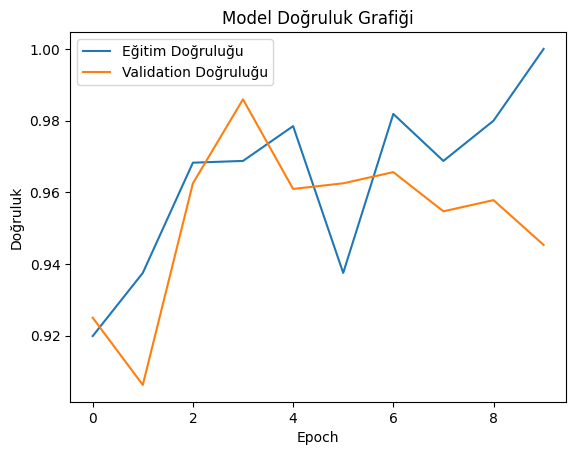

In [5]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Validation Doğruluğu')
plt.title("Model Doğruluk Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()


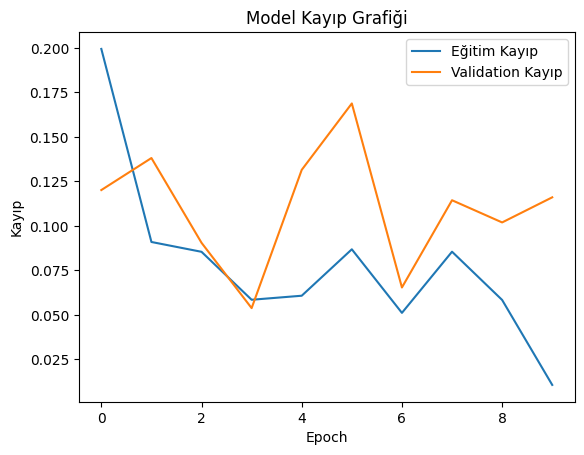

In [6]:
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Validation Kayıp')
plt.title("Model Kayıp Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.show()


In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'test_night5.jpg' # Örnek test görseli yolu
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Model 4D bekler

pred = model.predict(img_array)
pred_class = np.argmax(pred)

# class_indices sözlüğü (örneğin {'day': 0, 'night': 1})
class_labels = list(train_gen.class_indices.keys())
print(f"Tahmin edilen sınıf: {class_labels[pred_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Tahmin edilen sınıf: dayY


In [72]:
import os
import shutil

# Ana klasördeki görsellerin bulunduğu yol
source_dir = "daylightroadimages"
# Her 80'de 1 görselin taşınacağı hedef klasör
target_dir = "daylightroadimages_reduced"

# Hedef klasör yoksa oluştur
os.makedirs(target_dir, exist_ok=True)

# Görselleri sırala
image_files = sorted(os.listdir(source_dir))

# Her 80'de 1 görseli taşı
for idx, filename in enumerate(image_files):
    if idx % 80 == 0:
        src_path = os.path.join(source_dir, filename)
        dst_path = os.path.join(target_dir, filename)
        shutil.copy(src_path, dst_path)  # veya shutil.move(...) taşımak için
